In [2]:
%load_ext zipline
%matplotlib inline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


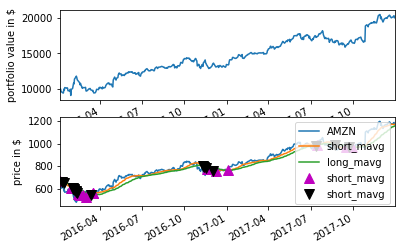

,AMZN,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,636.99,NaN,0.000000,NaN,-0.013979,NaN,NaN,0.00,10000.000000,0.00,...,668.435000,0.00,0,NaN,10000.000000,0.00,0.00,1,[],0.0224
2016-01-05 21:00:00+00:00,633.79,0.001122,-0.000100,-0.022480,-0.012312,0.175904,-0.006381,-9507.85,492.150000,9506.85,...,666.972000,0.00,0,-11.224972,10000.000000,0.00,0.00,2,"[{'dt': 2016-01-05 21:00:00+00:00, 'order_id':...",0.0225
2016-01-06 21:00:00+00:00,632.65,0.015236,-0.001810,-0.063529,-0.024771,0.137796,0.042320,0.00,492.150000,9489.75,...,665.029500,0.00,0,-9.684529,492.150000,9506.85,9506.85,3,[],0.0218
2016-01-07 21:00:00+00:00,607.94,0.290205,-0.038875,1.553808,-0.048168,0.167837,1.300900,0.00,492.150000,9119.10,...,663.170500,0.00,0,-8.315345,492.150000,9489.75,9489.75,4,[],0.0216
2016-01-08 21:00:00+00:00,607.05,0.258047,-0.040310,1.946684,-0.058616,0.145620,1.320520,18210.50,18702.650000,-9105.75,...,659.701000,-9105.75,1,-7.716400,492.150000,9119.10,9119.10,5,"[{'dt': 2016-01-08 21:00:00+00:00, 'order_id':...",0.0213
2016-01-11 21:00:00+00:00,617.74,0.237471,-0.056345,-0.577229,-0.057684,0.154994,0.737094,0.00,18702.650000,-9266.10,...,656.814000,-9266.10,1,-9.080934,18702.650000,-9105.75,-9105.75,6,[],0.0217
2016-01-12 21:00:00+00:00,617.89,0.223825,-0.056570,-0.862910,-0.050081,0.177568,0.657572,0.00,18702.650000,-9268.35,...,654.585000,-9268.35,1,-8.442246,18702.650000,-9266.10,-9266.10,7,[],0.0212
2016-01-13 21:00:00+00:00,581.81,0.422306,-0.002450,-1.213581,-0.073772,0.192027,-0.508353,0.00,18702.650000,-8727.15,...,653.472000,-8727.15,1,-0.002371,18702.650000,-9268.35,-9268.35,8,[],0.0208
2016-01-14 21:00:00+00:00,593.00,0.405055,-0.019335,-1.407857,-0.058567,0.225892,-0.561834,1185.00,19887.650000,-10081.00,...,649.667000,-10081.00,1,-2.030501,18702.650000,-8727.15,-8727.15,9,"[{'dt': 2016-01-14 21:00:00+00:00, 'order_id':...",0.0210
2016-01-15 21:00:00+00:00,570.18,0.434877,0.019459,-1.069870,-0.078776,0.225682,-0.805305,0.00,19887.650000,-9693.06,...,646.385000,-9693.06,1,2.571083,19887.650000,-10081.00,-10081.00,10,[],0.0203


In [6]:
%%zipline --start 2016-1-1 --end 2018-1-1 -b quantopian-quandl --capital-base 10000

from zipline.api import symbol, record, order_target_percent
import matplotlib.pyplot as plt

def initialize(context):
    context.amzn = symbol('AMZN')
    
def handle_data(context, data):
    record(AMZN=data[context.amzn].price)
    
    # take the average of the previous 40 days (exclude the current day)
    long_mavg = data.history(context.amzn, 'close', 41, '1d')[:-1].mean()
    short_mavg = data.history(context.amzn, 'close', 21, '1d')[:-1].mean()
    
    record(long_mavg=long_mavg)
    record(short_mavg=short_mavg)
    
    # need to check whether the security is tradable - 
    #     it may be halted due to some event
    if short_mavg > long_mavg and data.can_trade(context.amzn):
        # allocate %100 of our stock to amzn
        order_target_percent(context.amzn, 1.00)
    else:
        if short_mavg < long_mavg and data.can_trade(context.amzn):
            order_target_percent(context.amzn, -1.00)
        
def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')
    
    ax2 = fig.add_subplot(212)
    perf['AMZN'].plot(ax=ax2, label='AMZN')
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)
    
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    
    plt.legend(loc=0)
    plt.show()